<a href="https://colab.research.google.com/github/geocarvalho/python-ds/blob/master/alura/regressao2/alura_regressao_linear2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

# Dataset sobre mercado imobiliario

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/geocarvalho/python-ds/master/alura/regressao2/dataset.csv', sep=';')
df.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


# Análise descritiva das variáveis

In [5]:
df.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


In [6]:
# Matriz de correlação
df.corr().round(4)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Praia,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


# Comportamento da variável dependente

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('Accent')
sns.set_style('darkgrid')

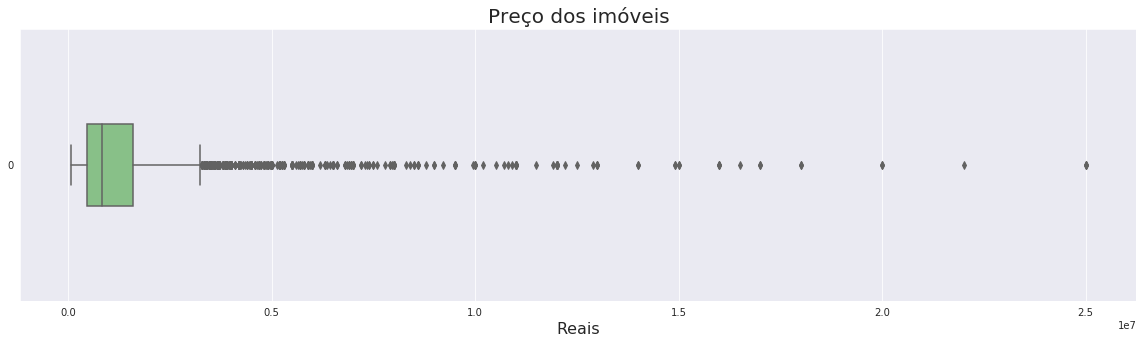

In [10]:
ax = sns.boxplot(data=df['Valor'], orient='h', width=0.3)
ax.figure.set_size_inches(20,5)
ax.set_title('Preço dos imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
plt.show()

# Distribuição de frequências

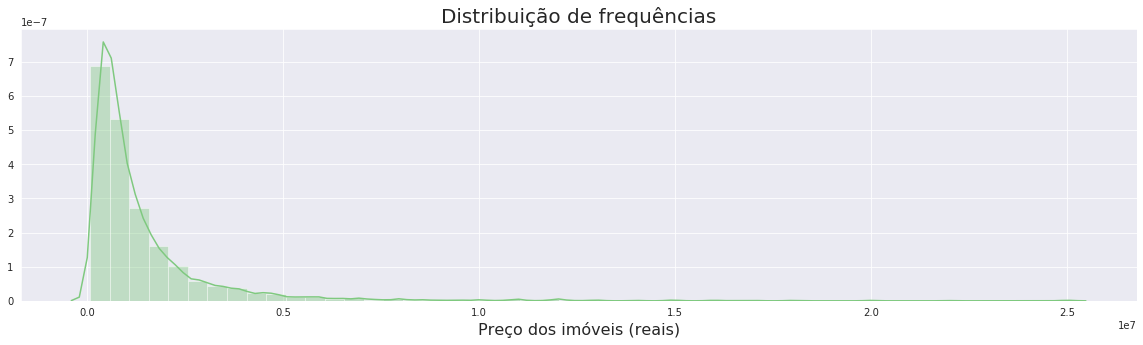

In [12]:
 ax = sns.distplot(df['Valor'])
ax.figure.set_size_inches(20,5)
ax.set_title('Distribuição de frequências', fontsize=20)
ax.set_xlabel('Preço dos imóveis (reais)', fontsize=16)
plt.show()

# Disperção entre as variáveis

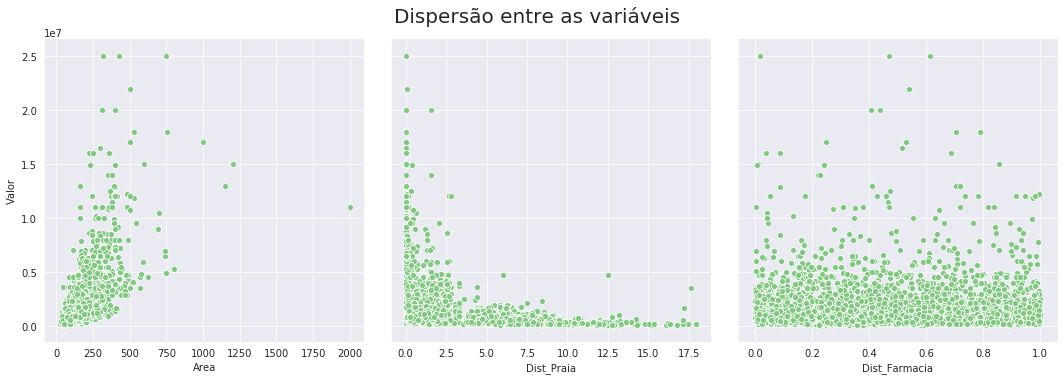

In [14]:
ax = sns.pairplot(df, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], height=5)
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.05)
plt.show()

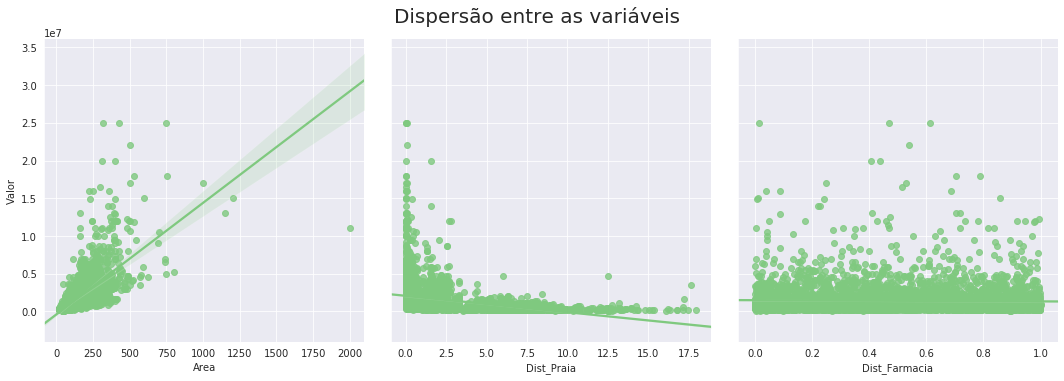

In [15]:
ax = sns.pairplot(df, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], kind='reg', height=5)
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.05)
plt.show()

# Transformando os dados
* Transformação logaritmica

In [16]:
import numpy as np

np.log(1)

0.0

In [17]:
np.log(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [18]:
df['log_Valor'] = np.log(df['Valor'])
df['log_Area'] = np.log(df['Area'])
df['log_Dist_Praia'] = np.log(df['Dist_Praia']+1)
df['log_Dist_Farmacia'] = np.log(df['Dist_Farmacia']+1)
df.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


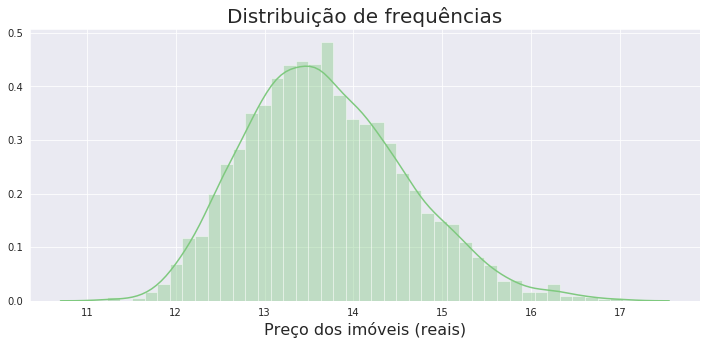

In [21]:
ax = sns.distplot(df['log_Valor'])
ax.figure.set_size_inches(12,5)
ax.set_title('Distribuição de frequências', fontsize=20)
ax.set_xlabel('Preço dos imóveis (reais)', fontsize=16)
plt.show()

# Verificando relação linear

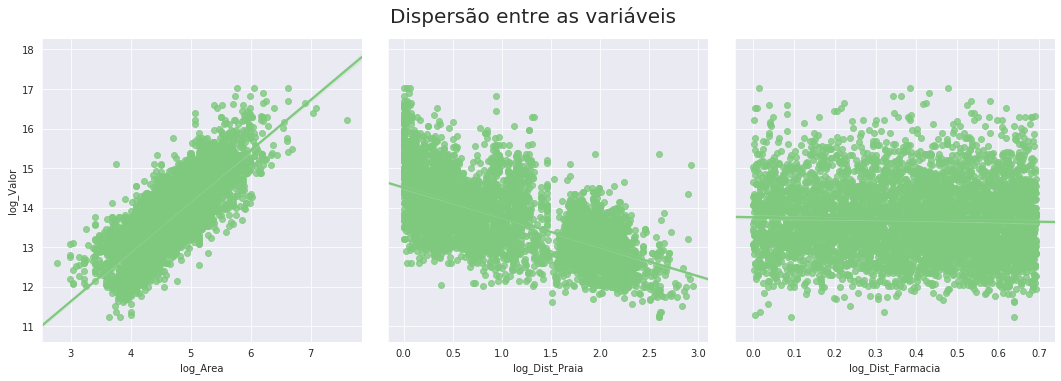

In [22]:
ax = sns.pairplot(df, y_vars='log_Valor', x_vars=['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'], kind='reg', height=5)
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20, y=1.05)
plt.show()

# Criando os datasets de treino e teste

In [23]:
from sklearn.model_selection import train_test_split

y = df['log_Valor']
X = df[['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 3), (1000, 3), (4000,), (1000,))

# Regressão linear

* Modelo log-linear

$Y_i = \beta_1 X^{\beta_2}_{2i}X^{\beta_3}_{3i} e^{u_i}$

$lnY_i = ln\beta_1 + \beta_2lnX_{2i} + \beta_3lnX_{3i} + u_i$

* Propriedades dos logaritmos:
> 1. $ln(AB) = lnA + lnB$
> 2. $ln(\frac{A}{B}) = lnA - lnB$
> 3. $ln(A^k) = k \times lnA$
> 4. $ln e = 1$

Para A e B positivos e K constante

In [0]:
import statsmodels.api as sm

In [25]:
X_train_cons = sm.add_constant(X_train)
X_train_cons.head()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903


In [27]:
lr_sm = sm.OLS(y_train, X_train_cons, hasconst=True).fit()
print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:09:59   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.06

# Avaliando o modelo estimado

* `F-statistic` testa a significância conjuntamente para Prob(F-statistic) < 0.05;
* `Test-t` testa a significância para cada variável (`log_Dist_Farmacia` foi rejeitado para P>|t| < 0.05, deverá ser excluído)

# Modificando o modelo e avaliando novamente o ajuste

In [28]:
y = df['log_Valor']
X = df[['log_Area', 'log_Dist_Praia']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 2), (1000, 2), (4000,), (1000,))

In [29]:
X_train_cons = sm.add_constant(X_train)
X_train_cons.head()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,log_Area,log_Dist_Praia
2661,1.0,5.945421,0.000000
912,1.0,3.135494,0.972865
3042,1.0,4.317488,1.794961
141,1.0,3.401197,0.310455
3854,1.0,5.676754,0.032193


In [30]:
lr_sm = sm.OLS(y_train, X_train_cons, hasconst=True).fit()
print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:18:38   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.

# Estimando o modelo com os dados de treino

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
print('R² = {}'.format(lr.score(X_train, y_train).round(3)))

R² = 0.805


In [36]:
y_previsto = lr.predict(X_test)
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(3)))

R² = 0.79


# Obtendo previsões pontuais

In [37]:
entrada = X_test[0:1]
entrada

,log_Area,log_Dist_Praia
1006,5.273,1.282769


In [42]:
# resultando em log para reais
np.exp(lr.predict(entrada)[0])

1598889.784779439

In [43]:
# Simulador simples

Area = 250
Dist_Praia = 1
entrada = [[np.log(Area), np.log(Dist_Praia)+1]]
entrada

[[5.521460917862246, 1.0]]

In [45]:
np.exp(lr.predict(entrada))[0]

2389133.859677186

# Interpretação dos coeficientes estimados

* Intercept representa o efeito médio em Y (preço dos imóveis) retirando o efeito das variáveis explicativas do modelo;

* No caso do modelo log-linear este coeficiente deve ser transformado com o uso da função exponencial para ser representado em R$.


In [47]:
np.exp(lr.intercept_)

11326.681428069842

* Os coeficientes de regressão $\beta_2$ e $\beta_3$ são conhecidos como coeficinetes parciais de regressao ou coeficientes parciais angulares;
* Um aspecto interessante do modelo log-linear que o tornou muito utilizado é que os coeficientes angulares $\beta_2$ e $\beta_3$ medem as elasticidades de Y em relação a $X_2$ e $X_3$, isto é, a variação percentual de Y correspondente a uma dada variação percentual (pequena) em $X_2$ e $X_3$.

In [48]:
lr.coef_

array([ 1.05807818, -0.49061226])

In [49]:
X.columns

Index(['log_Area', 'log_Dist_Praia'], dtype='object')

In [52]:
lista = ['intercept', 'log Area', 'log Distancia ate a praia']
pd.DataFrame(data=np.append(lr.intercept_, lr.coef_), index=lista, columns=['Parametros'])

,Parametros
intercept,9.334916
log Area,1.058078
log Distancia ate a praia,-0.490612


# Interpretação dos coeficientes estimados

* Intercepto - excluindo o efeito das variáveis explicativas ($X_2$ = $X_3$ = 0) o efeito médio no preço dos imóveis seria de R$ 11.326,68;

* Area - Mantendo o valor de $X_3$ (distancia ate a praia) constante, um acrescimo de 1% na area de um imovel gera, em media, um acrescimo de 1,06% no preço do imovel;

* Distancia ate a praia - Mantendo-se o valor de $X_2$ (area) constante, um acrescimo de 1% na distancia de um imovel ate a praia gera, em media, um decrescimo de 0,49% no preço do imovel.

# Análise gráfica dos resultados do modelo

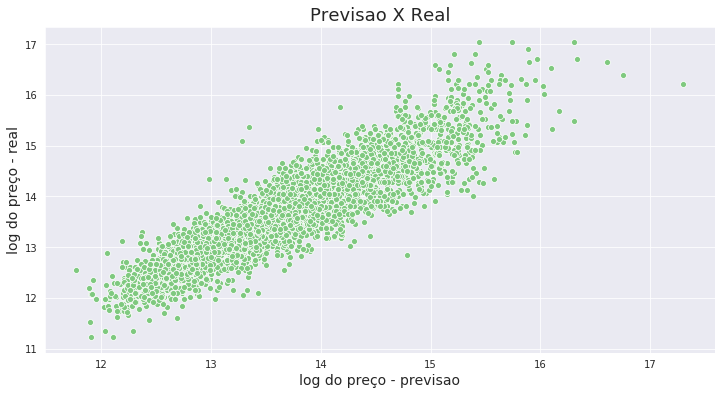

In [54]:
y_previsto_train = lr.predict(X_train)

ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsao X Real', fontsize=18)
ax.set_xlabel('log do preço - previsao', fontsize=14)
ax.set_ylabel('log do preço - real', fontsize=14)
plt.show()

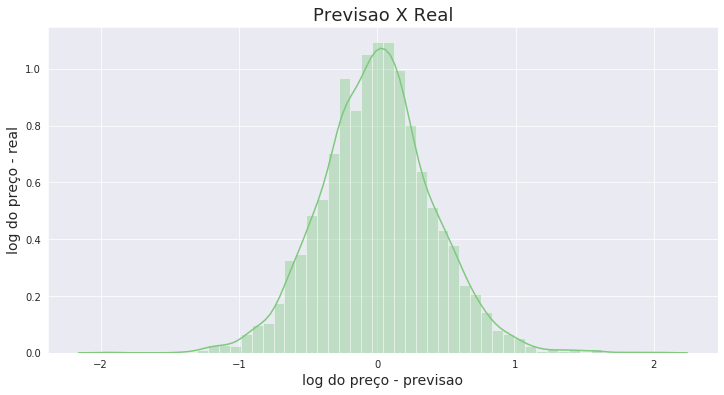

In [55]:
# calculo do residuo

residuo = y_train - y_previsto_train

ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsao X Real', fontsize=18)
ax.set_xlabel('log do preço - previsao', fontsize=14)
ax.set_ylabel('log do preço - real', fontsize=14)
plt.show()